#Actividad Individual 2 Módulo 5

#Preguntas guía

- Algoritmos de regresión lineal simple

La regresión lineal es un método estadístico que trata de modelar la relación entre una variable continua y una o más variables independientes mediante el ajuste de una ecuación lineal. Se llama regresión lineal simple cuando solo hay una variable independiente y regresión lineal múltiple cuando hay más de una. Dependiendo del contexto, a la variable modelada se le conoce como variable dependiente o variable respuesta, y a las variables independientes como regresores, predictores o features.

- Quién o qué es la variable respuesta

A la variable modelada se le conoce como variable dependiente o variable respuesta. Una variable de respuesta es un resultado medido dentro de un ensayo que puede ser influenciado por otros factores. Por ejemplo, en un ensayo se puede probar si un fármaco nuevo es eficaz para reducir un síntoma determinado de una enfermedad del corazón.


#Ejercicios planteados

Ejercicio: 

Suponga que le han pedido averiguar si existe una relación entre el
número de veces que batean los jugadores de un equipo de béisbol y el número de runs que consigue. En caso de existir y de establecer un modelo, podría predecir el resultado del partido para los siguientes datos:

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd


equipos = ["Texas","Boston","Detroit","Kansas","St.","New_S.","New_Y.", "Milwaukee","Colorado","Houston","Baltimore","Los_An.","Chicago", "Cincinnati","Los_P.","Philadelphia","Chicago","Cleveland","Arizona", "Toronto","Minnesota","Florida","Pittsburgh","Oakland","Tampa",
"Atlanta","Washington","San.F","San.I","Seattle"]
bateos = [5659, 5710, 5563, 5672, 5532, 5600, 5518, 5447, 5544, 5598, 5585, 5436, 5549, 5612, 5513, 5579, 5502, 5509, 5421, 5559, 5487, 5508, 5421, 5452, 5436, 5528, 5441, 5486, 5417, 5421]
runs = [855, 875, 787, 730, 762, 718, 867, 721, 735, 615, 708, 644, 654, 735, 667, 713, 654, 704, 731, 743, 619, 625, 610, 645, 707, 641, 624, 570, 593, 556]
datos = pd.DataFrame({'equipos': equipos, 'bateos': bateos, 'runs': runs})           
datos.head(5)

,equipos,bateos,runs
0,Texas,5659,855
1,Boston,5710,875
2,Detroit,5563,787
3,Kansas,5672,730
4,St.,5532,762


Para esto obtenga lo siguiente:
1. Obtenga la distribución de los datos


In [ ]:
datos.describe()

,bateos,runs
count,30.000000,30.000000
mean,5523.500000,693.600000
std,79.873067,82.479088
min,5417.000000,556.000000
25%,5448.250000,629.000000
50%,5515.500000,705.500000
75%,5575.000000,734.000000
max,5710.000000,875.000000


2. Separe sus datos de entrenamiento en 80/20.

In [ ]:
# Separate the features and target variable
#X = datos[['bateos']]
#y = datos.runs
#type(X), X.shape
#type(y), y.shape

In [ ]:
# Separate the features and target variable
# de esta forma se consiguen en formato array
X = datos.iloc[:, 1:2].values 
y = datos.iloc[:, 2:3].values 

In [ ]:
type(X), X.shape

(numpy.ndarray, (30, 1))

In [ ]:
type(y), y.shape

(numpy.ndarray, (30, 1))

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2
)

3. Ajuste un modelo de regresión lineal.

In [ ]:
# Create a linear regression model
model = LinearRegression()

# Fit the model on the training set
model.fit(X_train, y_train)

LinearRegression()

4. Escriba la recta de regresión que obtuvo con sus estimaciones
respectivas.

In [ ]:
# pendiente de la recta
coefficients = model.coef_
# donde intercepta ordenada en el origen  
intercept = model.intercept_
display("Coefficients:", coefficients)
display("Intercept:", intercept)

'Coefficients:'

array([[0.52676357]])

'Intercept:'

array([-2225.12048315])

In [ ]:
# Evaluate the model on the testing set
score = model.score(X_test, y_test)
print("Model Score (R^2):", score)

Model Score (R^2): 0.36106446552199256


In [ ]:
print(f"el modelo sigue la ecuación runs = {intercept[0]:.2f} + {coefficients[0][0]:.4f}bateos  ")

el modelo sigue la ecuación runs = -2225.12 + 0.5268bateos  


5. Obtenga la gráfica de los datos y su recta de regresión

In [ ]:
# prediction
y_pred = model.predict(X_test)

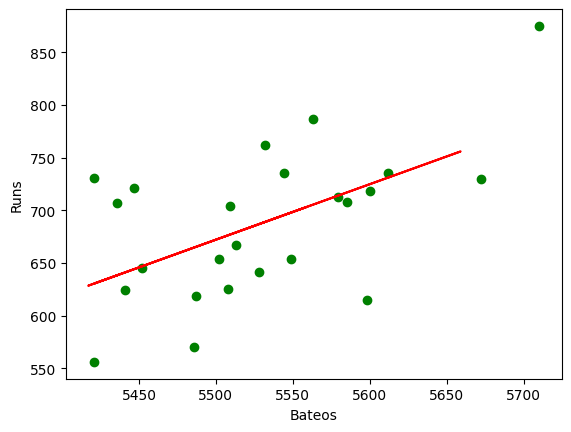

In [ ]:
# plot regression line
plt.scatter(X_train, y_train,color='g') 
plt.plot(X_test, y_pred, color='r') 
plt.xlabel("Bateos")
plt.ylabel("Runs")
plt.show()

6. Obtenga las métricas: MAE, MSE, RMSE.

In [ ]:
# true and predicted values
y_true = y_test

# Mean Absolute Deviation (MAD)
mae = mean_absolute_error(y_true, y_pred)
print(f"Mean Absolute Deviation (MAD): {mae:.2f}")

# Mean Squared Error (MSE)
mse = mean_squared_error(y_true, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

# Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_true, y_pred, squared=False)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Absolute Deviation (MAE): 64.32
Mean Squared Error (MSE): 7918.26
Root Mean Squared Error (RMSE): 88.98


7. Concluya con los datos obtenidos y comente la problemática que le han planteado al principio.



Se puede observar que existe una correlación positiva y aunque los indicadores de la variable explicativa no es de lo mejor con los suficientes ajustes podría mejorar el modelo. La pendiente positiva indica que la relación es directa, es decir, a mayor número de bateos mayor número de runs lo que indica que el modelo tiende a explicar la respuesta pero se necesita ajustar los parámetros para las variables y así mejorar el modelo.